# Практическая работа №3: Название работы
Выполнил студент гр. 0382 Кондратов Юрий. Вариант №36.

## Цель работы
Овладеть навыками работы с математическими пакетами для статистического анализа социальных сетей.

## Основные теоретические положения


$D_{i,j} = (1, 1)$ - __взаимная__ диада;

$D_{i,j} = (1, 0)$, $D_{i,j} = (0, 1)$ - __ассиметричнае__ диады;

$D_{i,j} = (0, 0)$ - __нулевая__ диада.

__Цензус__ диад - тройка чисел: $<M, A, N>$ - где: $M$ - количество взаимных диад, $A$ - количество асимметричных диад, $N$ - количество нулевых диад.

Вычисление цензуса:
* $M = \frac{1}{2} trace(𝐗𝐗)$
* $A = trace(𝐗𝐗^{T}) - 2M$
* $N = C_g^2 - A - M$

__Индекс Каца-Пауэлла__ - это число $-\infty <  \rho_{kp} \leq 1$, такое что $ℙ(j \to i | i \to j) = ℙ(j \to i) + \rho_{kp}ℙ(j \not\to i)$.

Оценки индекса КП:
* Если каждый актор выбирает d других акторов: $\hat{\rho}_{kp}=\frac{2(g-1)M - gd^2}{gd(g - 1 - d)}$
* Если каждый актор делает свободный выбор: $\hat{\rho}_{kp}'=\frac{2(g-1)^2M - L^2 + L_2}{L(g - 1)^2 - L^2 + L_2}$, где: $L = \sum{x_{i+}}$, $L_2 = \sum{x^2_{i+}}$

__Индекс Бандиопадхьяйя__ - число $\rho_{b} = \frac{M - M_{min}}{M_{max} - M_{min}}$, показывающее, какая часть от всех возможных взаимных диад присутствует в графе. Здесь $M_{min} = \underset{0 \le t \le g}{max}\{\sum_{i=1}^tx_{i+} - t(g-1) - C_t^2\}$, $M_{max} = ⌊1/2\{\sum_{i=1}^tx_{i+} - \underset{0 \le t \le g}{max}\{\sum_{i=1}^tx_{i+} - t(t-1) - \sum_{i=t+1}^g min(t, x_{i+})\}⌋$

__Критерии__ для проверки гипотез:

* Для проверки $𝐿 ∼ Bin(𝑔(𝑔−1), 1/2)$ используется $z_l = \frac{l - g(g-1)/2}{\sqrt{g(g-1)/4}} ∼ N(0, 1)$;
* Для проверки $𝐿 ∼ Bin(𝑔(𝑔−1), 𝑃_0)$ используется $z_l = \frac{l - 𝑃_0g(g-1)}{\sqrt{𝑃_0(1-𝑃_0)g(g-1)}} ∼ N(0, 1)$.

__Доверительный интервал для $P_0$__: $[\hat{P} - z_{\alpha/2}\sqrt{\hat{P}(1 - \hat{P})/g(g-1)}, \hat{P} + z_{\alpha/2}\sqrt{\hat{P}(1 - \hat{P})/g(g-1)}]$, где $\hat{P} = \frac{l}{g(g-1)}$.

## Постановка задачи
С помощью математических пакетов и соответствующих библиотек провести статистический анализ случайно смоделированного ориентированного графа. Полученные результаты содержательно проинтерпретировать.

## Выполнение работы

In [ ]:
import networkx as nx
import numpy as np
import math
from scipy.stats import norm

g, p, P_0, alpha = 66, 0.51, 0.64, 0.05

1. Смоделировать случайный орграф
$𝔊_d$ на основе модели Эрдеша—Реньи: $𝔊_d = 𝔊(g, 𝑝)$, где $g$ – количество акторов, $𝑝$ – вероятность появления дуги между акторами. Ознакомьтесь с данной моделью и опишите
её.


In [ ]:
graph = nx.erdos_renyi_graph(g, p, directed=True)

> В данном случае модель следующая: каждая пара из $g$ вершин с вероятностью $p$ соединяется ребром (пары упорядочены, так как ребра направленные). Также существует вариант модели когда задана не вероястность появления ребра, а количество ребёр $M$. В этом случае в качестве результата выбирается случайный граф из всех возможных графов на $g$ вершинах с $M$ ребрами (предполагается что выбор графа осуществялется на основе равномерного распределения). 

2. Отобразить полученный орграф.

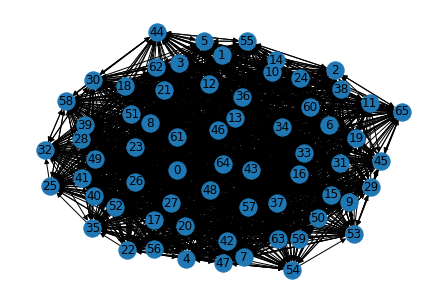

In [ ]:
nx.draw_kamada_kawai(graph, with_labels=True)

3. Вычислить «пятичисловую сводку» для графа $𝔊_d$.

In [ ]:
graph.number_of_nodes()


66

In [ ]:
nx.density(graph)

0.5074592074592075

In [ ]:
nx.number_strongly_connected_components(graph)

1

In [ ]:
# diameter
max([max(j.values()) for _, j in nx.shortest_path_length(graph)])

2

In [ ]:
nx.transitivity(graph)

0.5078607444337432

4. Вычислить цензус диад. Сделать выводы.

In [ ]:
matr = nx.to_numpy_array(graph)
tr = np.matmul(matr, matr).trace()
M = 1/2 * tr
A = np.matmul(matr, np.transpose(matr)).trace() - tr
N = math.comb(g, 2) - A - M
f'<{M}, {A}, {N}>'

'<547.0, 1083.0, 515.0>'

> Вывод: в построенном графе 547 взаимных диад, 1083 ассиметричных диад и 515 нулевых диад.

5. Вычислить оценку индекса взаимности Каца—Пауэла.

* При фиксированом выборе акторов $d$:

In [ ]:
d = g * p
rho_kp_fixed = lambda d: (2 * (g - 1) * M - g * d * d) / (g * d * (g - 1 - d))
rho_kp_fixed(d)

-0.05267904615409493



 * При свободном выборе:



In [ ]:
L = nx.number_of_edges(graph)
L_2 = sum(sum(x) ** 2 for x in matr)
rho_kp_free = (2 * (g - 1) ** 2 * M - L * L + L_2) / (L * (g - 1) ** 2 - L * L + L_2)
rho_kp_free

-0.009798120927058751

> Выводы: по итогам проведения некоторого количества экспериметов было выяснено, что $\hat{\rho}_{KP}'$ всегда близок к 0 (то есть наличие дуги от $j$ к $i$ практически не зависит от наличия дуги от $i$ к $j$). Такое же наблюдение прослеживается и у $\hat{\rho}_{KP}$ при $d = g \cdot p$ (выбранно именно такое $d$ потому что теоретически вероятность наличия дуги равна $p$ значит дуг в среднем будет $g \cdot p$).

6. Вычислить вероятность того, что связь будет взаимной.

* При фиксированом выборе акторов $d$:

In [ ]:
d / (g - 1) * (d / (g - 1)  + rho_kp_fixed(d) * (g - 1 - d)/(g - 1))

0.25501165501165507



 * При свободном выборе:



In [ ]:
d / (g - 1) * (d / (g - 1)  + rho_kp_free * (g - 1 - d)/(g - 1))

0.26571822937806255

> Выводы: вероятности получились примерно одинаковы и близки к $p^2 = 0.2601$ (как и ожидается, если наличие дуги от  $j$  к  $i$ практически не зависит от наличия дуги от  $i$  к  $j$).

7. Вычислить индекс взаимности Бандиопадхьяйя. Сделать выводы.

In [ ]:
f_t = lambda t: sum(sum(matr[i]) for i in range(0, t)) - t * (g - 1) - math.comb(t, 2)
g_t = lambda t: sum(sum(matr[i]) for i in range(0, t)) - t * (t - 1) - sum(min(t, sum(matr[i])) for i in range(t, g))
M_min = f_t(max(range(0, g + 1), key=f_t))
M_max =  (nx.number_of_edges(graph) - g_t(max(range(0, g + 1), key=g_t))) // 2
rho_b = (M - M_min) / (M_max - M_min)
rho_b

0.5027573529411765

> Вывод: из всех возможных взаимных диад в графе присутствует примерно $50$ процентов.



8. Проверить нулевую гипотезу о том, что число дуг $𝐿$ в орграфе
$𝔊_d$ имеет биномиальное распределение $𝐿 ∼ Bin(𝑔(𝑔 − 1), 1/2)$ при
уровне значимости $𝛼$. Определить максимальный уровень значимости при котором нулевая гипотеза не отвергается.

In [ ]:
l = nx.number_of_edges(graph)
z_l = (l - g * (g - 1) / 2) / (g * (g - 1) / 4) ** (1 / 2)
p_val = norm.sf(abs(z_l))
p_val >= alpha / 2, p_val

(True, 0.16425296632298753)

9. Проверить нулевую гипотезу о том, что число дуг $𝐿$ в орграфе
$𝔊_d$
имеет биномиальное распределение $𝐿 ∼ Bin(𝑔(𝑔−1), 𝑃_0)$ при уровне
значимости 𝛼. Определить максимальный уровень значимости при
котором нулевая гипотеза не отвергается.


In [ ]:
l = nx.number_of_edges(graph)
z_l = (l - g * (g - 1) * P_0) / (P_0 * (1 - P_0) * g * (g - 1)) ** (1 / 2)
p_val = norm.sf(abs(z_l))
p_val >= alpha / 2, p_val

(False, 2.062872205273336e-73)

10. Построить доверительный интервал для оценки параметра 𝑝 с доверительной надёжностью (1 − 𝛼). Сделать выводы.

In [ ]:
l = nx.number_of_edges(graph)
p_hat = l / (g * (g - 1))
dif = norm.sf(alpha / 2) * (p_hat * (1 - p_hat)/(g * (g - 1))) ** (1/2)
p_low = p_hat - dif
p_up = p_hat + dif
[p_low, p_up]

[0.5037188469620708, 0.5111995679563441]

> Выводы: можно заметить, что доверительный интервал очень маленький, это позволяет достаточно точно оценить вероятность появления дуги. Также видно, что числа из интервала близки к искомой вероятности $P_0 = 0.51$.

## Выводы

В ходе работы был проведён статистический анализ графа, построенного при помощи модели Эрдеша—Реньи.

В ходе анализа получены следующие результаты:
* вероятность появления взаимной диады близка к $p^2 = 0.2601$;
* наличие дуги между вершинами практически не влияет на наличие обратной дуги;
* граф содержит примерно 50% из всех возможных взаимных диад;
* гипотеза $𝐿 ∼ Bin(𝑔(𝑔−1), 1/2)$ принимается;
* гипотеза $𝐿 ∼ Bin(𝑔(𝑔−1), 𝑃_0)$ отвергается;
* истинная вероятность $p$ входит в ДИ.